# 02: Download Data

- Download LANDSAT as annual composite
- Download census data

In [71]:
import ee
import time
import rioxarray
import earthpy.plot as ep
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

## Landsat

Useful link: https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/landsat-in-Python/


In [51]:
i_date = '2005-01-01'
f_date = '2005-12-31'
landsat = ee.ImageCollection("LANDSAT/LE07/C02/T1").filterDate(i_date, f_date)
# get annual composite
composite = ee.Algorithms.Landsat.simpleComposite(landsat)

In [52]:
composite

In [53]:
print(composite)

ee.Image({
  "functionInvocationValue": {
    "functionName": "Landsat.simpleComposite",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection.filter",
          "arguments": {
            "collection": {
              "functionInvocationValue": {
                "functionName": "ImageCollection.load",
                "arguments": {
                  "id": {
                    "constantValue": "LANDSAT/LE07/C02/T1"
                  }
                }
              }
            },
            "filter": {
              "functionInvocationValue": {
                "functionName": "Filter.dateRangeContains",
                "arguments": {
                  "leftValue": {
                    "functionInvocationValue": {
                      "functionName": "DateRange",
                      "arguments": {
                        "end": {
                          "constantValue": "2005-12-31"
                        },
     

In [54]:
# Define region
region = ee.Geometry.BBox(136.59611, 35.6419, 140.5391 , 36.60685)

In [55]:
task = ee.batch.Export.image.toDrive(image = composite,
                                     fileNamePrefix = 'test_japan_landsat',
                                     region = region,
                                     scale = 30)

In [56]:
task.start()

In [72]:
while task.status()['state'] == 'RUNNING':
    time.sleep(10)
    print('Still Running')

Still Running
Still Running
Still Running
Still Running
Still Running
Still Running
Still Running
Still Running
Still Running
Still Running
Still Running
Still Running
Still Running


In [80]:
tiff = rioxarray.open_rasterio('../data/test_japan_landsat.tif')
tiff_ds = tiff.to_dataset('band')

In [81]:
tiff_ds

<xarray.Dataset>
Dimensions:      (y: 3582, x: 14632)
Coordinates:
  * x            (x) float64 136.6 136.6 136.6 136.6 ... 140.5 140.5 140.5 140.5
  * y            (y) float64 36.61 36.61 36.61 36.61 ... 35.64 35.64 35.64 35.64
    spatial_ref  int64 0
Data variables:
    1            (y, x) uint8 ...
    2            (y, x) uint8 ...
    3            (y, x) uint8 ...
    4            (y, x) uint8 ...
    5            (y, x) uint8 ...
    6            (y, x) uint8 ...
    7            (y, x) uint8 ...
    8            (y, x) uint8 ...
    9            (y, x) uint8 ...
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ('B1', 'B2', 'B3', 'B4', 'B5', 'B6_VCID_1', 'B6_VCID_2', '...

In [83]:
tiff_ds = tiff_ds.rename({1: 'B1',
                          2: 'B2',
                          3: 'B3',
                          4: 'B4',
                          5: 'B5',
                          6: 'B6_VCID_1',
                          7: 'B6_VCID_2',
                          8: 'B7',
                          9: 'B8'})

In [84]:
tiff_ds

<xarray.Dataset>
Dimensions:      (y: 3582, x: 14632)
Coordinates:
  * x            (x) float64 136.6 136.6 136.6 136.6 ... 140.5 140.5 140.5 140.5
  * y            (y) float64 36.61 36.61 36.61 36.61 ... 35.64 35.64 35.64 35.64
    spatial_ref  int64 0
Data variables:
    B1           (y, x) uint8 ...
    B2           (y, x) uint8 ...
    B3           (y, x) uint8 ...
    B4           (y, x) uint8 ...
    B5           (y, x) uint8 ...
    B6_VCID_1    (y, x) uint8 ...
    B6_VCID_2    (y, x) uint8 ...
    B7           (y, x) uint8 ...
    B8           (y, x) uint8 ...
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     ('B1', 'B2', 'B3', 'B4', 'B5', 'B6_VCID_1', 'B6_VCID_2', '...

In [85]:
tiff_ds.B1

<xarray.DataArray 'B1' (y: 3582, x: 14632)>
[52411824 values with dtype=uint8]
Coordinates:
  * x            (x) float64 136.6 136.6 136.6 136.6 ... 140.5 140.5 140.5 140.5
  * y            (y) float64 36.61 36.61 36.61 36.61 ... 35.64 35.64 35.64 35.64
    spatial_ref  int64 0

In [93]:
rgb_bands = [tiff_ds.B3, tiff_ds.B2, tiff_ds.B1]

In [95]:
# turn rgb bands into xarray object
landsat_rgb = xr.concat(rgb_bands, dim = "band")

In [96]:
landsat_rgb

<xarray.DataArray 'B3' (band: 3, y: 3582, x: 14632)>
array([[[31, 28, 27, ..., 21, 21, 22],
        [31, 30, 31, ..., 23, 21, 22],
        [30, 32, 33, ..., 22, 22, 21],
        ...,
        [10, 10, 10, ..., 25, 21, 18],
        [10, 11, 11, ..., 22, 23, 22],
        [12, 13, 13, ..., 21, 22, 24]],

       [[32, 31, 30, ..., 23, 24, 24],
        [32, 32, 32, ..., 25, 24, 25],
        [33, 33, 34, ..., 25, 24, 24],
        ...,
        [17, 16, 16, ..., 26, 23, 22],
        [17, 18, 18, ..., 24, 25, 25],
        [18, 18, 18, ..., 23, 25, 26]],

       [[39, 38, 39, ..., 29, 30, 31],
        [39, 39, 39, ..., 30, 31, 32],
        [39, 40, 40, ..., 31, 32, 31],
        ...,
        [24, 24, 24, ..., 31, 29, 28],
        [23, 24, 24, ..., 29, 29, 29],
        [23, 24, 24, ..., 30, 30, 30]]], dtype=uint8)
Coordinates:
  * x            (x) float64 136.6 136.6 136.6 136.6 ... 140.5 140.5 140.5 140.5
  * y            (y) float64 36.61 36.61 36.61 36.61 ... 35.64 35.64 35.64 35.64
    spatial_ref  int64 0
Dimensions without coordinates: band

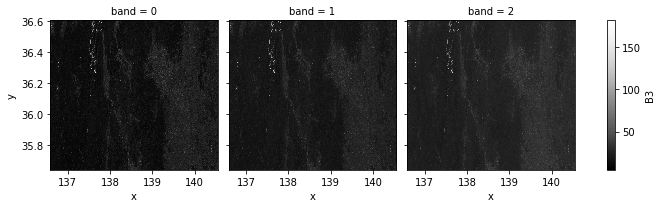

In [99]:
landsat_rgb.plot.imshow(col = "band", cmap = "Greys_r")
plt.show()

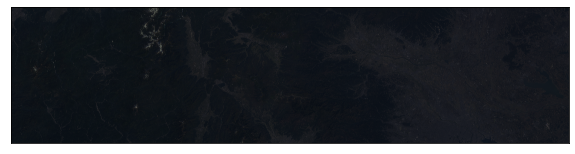

In [101]:
ep.plot_rgb(landsat_rgb.values)
plt.show()

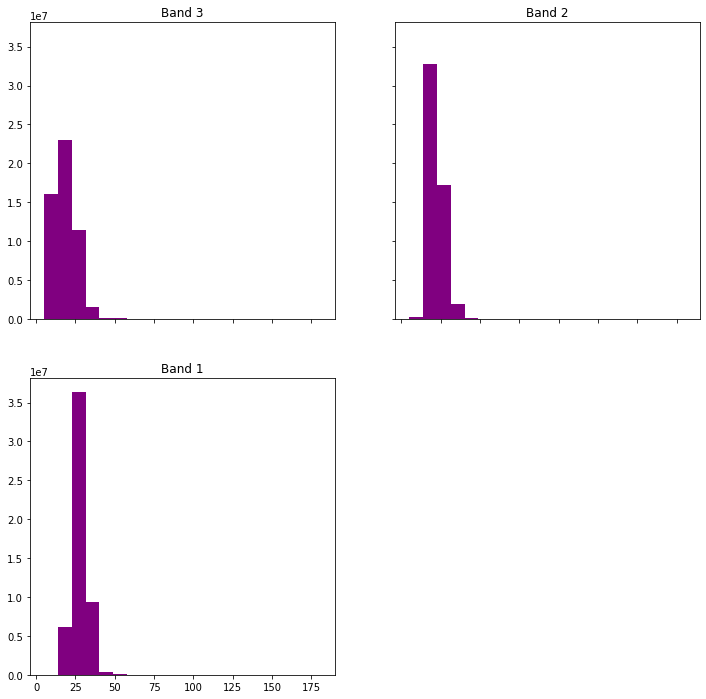

In [102]:
ep.hist(landsat_rgb.values, title = ["Band 3", "Band 2", "Band 1"])
plt.show()

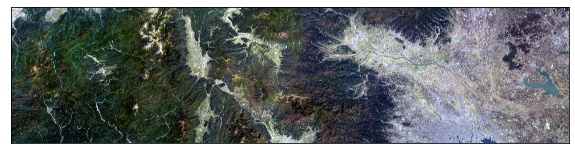

In [103]:
# Perform image stretching since values are very low
ep.plot_rgb(landsat_rgb.values, stretch = True)
plt.show()

## Census Data

In [104]:
census_2005 = ee.ImageCollection("CIESIN/GPWv411/GPW_Population_Count").filterDate(i_date, f_date).first()

In [105]:
census_2005

In [106]:
task = ee.batch.Export.image.toDrive(image = census_2005,
                                     fileNamePrefix = 'test_japan_census',
                                     region = region,
                                     scale = 1000) # ~ 1km resolution

In [107]:
task.start()

In [110]:
task.status()

{'state': 'COMPLETED',
 'description': 'myExportImageTask',
 'creation_timestamp_ms': 1662054713295,
 'update_timestamp_ms': 1662054738984,
 'start_timestamp_ms': 1662054732861,
 'task_type': 'EXPORT_IMAGE',
 'destination_uris': ['https://drive.google.com/'],
 'attempt': 1,
 'batch_eecu_usage_seconds': 0.050297629088163376,
 'id': '2KNTVQGNG2PHXUR6AAYG2DGO',
 'name': 'projects/earthengine-legacy/operations/2KNTVQGNG2PHXUR6AAYG2DGO'}

In [109]:
while task.status()['state'] == 'RUNNING':
    time.sleep(10)
    print('Still Running')

Still Running


In [113]:
tiff = rioxarray.open_rasterio('../data/test_japan_census.tif')
tiff_ds = tiff.to_dataset('band')
tiff_ds = tiff_ds.rename({1: 'population'})

In [114]:
tiff_ds

<xarray.Dataset>
Dimensions:      (y: 109, x: 440)
Coordinates:
  * x            (x) float64 136.6 136.6 136.6 136.6 ... 140.5 140.5 140.5 140.5
  * y            (y) float64 36.61 36.6 36.59 36.58 ... 35.67 35.66 35.65 35.64
    spatial_ref  int64 0
Data variables:
    population   (y, x) float32 ...
Attributes:
    scale_factor:  1.0
    add_offset:    0.0
    long_name:     population_count

In [115]:
tiff_ds.population

<xarray.DataArray 'population' (y: 109, x: 440)>
array([[188.70522 , 667.8994  , 232.18033 , ..., 104.38818 , 104.38818 ,
        106.20193 ],
       [691.2384  , 691.2384  , 691.23846 , ..., 104.41075 , 104.41077 ,
        104.41074 ],
       [691.31305 , 691.3131  , 691.3132  , ..., 104.42203 , 104.42205 ,
        104.42203 ],
       ...,
       [ 66.080956,  66.080956,  66.08096 , ..., 251.55809 , 252.9669  ,
        265.58246 ],
       [ 66.087845,  66.087845,  66.08785 , ..., 251.58429 , 251.58434 ,
        255.6569  ],
       [ 66.09474 ,  66.09475 ,  66.09476 , ..., 251.61058 , 251.61061 ,
        251.61058 ]], dtype=float32)
Coordinates:
  * x            (x) float64 136.6 136.6 136.6 136.6 ... 140.5 140.5 140.5 140.5
  * y            (y) float64 36.61 36.6 36.59 36.58 ... 35.67 35.66 35.65 35.64
    spatial_ref  int64 0

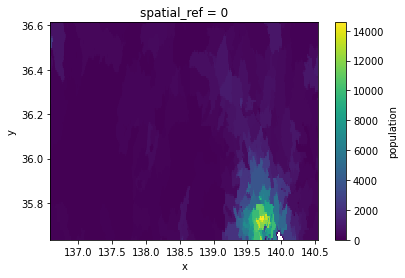

In [116]:
tiff_ds.population.plot()

In [118]:
tiff_ds.population.shape

(109, 440)